In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd
import requests
import re
from collections import Counter
import seaborn as sns
import nltk
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
df = pd.read_csv('feb3tweets.csv',names=['index','date','location','text'])

In [8]:
df.head()

,index,date,location,text
0,17,2019-02-03 10:23:00+00:00,NaN,"@claire__mrcl happy birthday, hope you have a ..."
1,18,2019-02-03 10:23:00+00:00,NaN,RT @XposeTrophyHunt: British socialite Lady Vi...
2,22,2019-02-03 10:23:00+00:00,NaN,RT @ccchapman3103: The Rolling Stones - Jumpin...
3,28,2019-02-03 10:23:00+00:00,NaN,@persianthoughtz This verily much happens to m...
4,34,2019-02-03 10:23:00+00:00,NaN,RT @spaceangel1964: Spent an hour reviewing th...


In [9]:
df.dtypes

index       object
date        object
location    object
text        object
dtype: object

In [10]:
df['date']=pd.to_datetime(df['date'])

In [11]:
df.dtypes

index                    object
date        datetime64[ns, UTC]
location                 object
text                     object
dtype: object

In [12]:
def clean_text(text):
    tweet = re.sub("(@_?[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split()
    return ' '.join(tweet)

In [13]:
df['text_clean'] = df['text'].map(lambda x: clean_text(str(x)))

In [14]:
df[df['text_clean'].duplicated()]

,index,date,location,text,text_clean
550,663,2019-02-03 10:22:16+00:00,NaN,RT @jasmineleia23: rt or ur worst week starts ...,RT rt or ur worst week starts now
615,1060,2019-02-03 10:22:25+00:00,NaN,RT @helmicmom: So do all Americans\n#TrumpResi...,RT So do all Americans TrumpResign NorthamMust...
617,1084,2019-02-03 10:22:26+00:00,NaN,RT @RG4hunnid_: Valentines day in elementary s...,RT Valentines day in elementary school gt gt g...
744,1872,2019-02-03 10:22:45+00:00,NaN,RT @TheLeahBlake: No one:\n\nCollege Student:\...,RT No one College Student idgaf if they hit
794,2219,2019-02-03 10:22:54+00:00,NaN,RT @jinolap__: แด่ English joke #Onet62 https:...,RT English joke Onet62
...,...,...,...,...,...
234609,2926,2019-02-04 01:56:59+00:00,NaN,"RT @brenden10g: Shitty ass time for me, I’ll t...",RT Shitty ass time for me I ll try anything tbh
234611,2930,2019-02-04 01:56:59+00:00,NaN,@Chbz_ @AaronPlays23 @SportsWyatt42 Done,Done
234613,2933,2019-02-04 01:56:59+00:00,NaN,RT @nickbaqueroo: Travis Scott who? Adam Levin...,RT Travis Scott who Adam Levine who this is my...
234614,2934,2019-02-04 01:56:59+00:00,NaN,RT @LIBGyal: Don't. Ejaculate. In. Women. You....,RT Don t Ejaculate In Women You Don t Like Don...


In [15]:
df_clean = df.copy()
df_clean.drop_duplicates(subset ="text_clean", inplace = True) 

In [16]:
key_word_list1 = ['wildfire','wildfires']
pattern1 = re.compile('|'.join(key_word_list1),re.IGNORECASE)
df_clean['label'] = df_clean['text_clean'].map(lambda x: pattern1.search(x) is not None)
df_clean['label'] = df_clean['label'].map(lambda x : int(x))

In [17]:
df_clean

,index,date,location,text,text_clean,label
0,17,2019-02-03 10:23:00+00:00,NaN,"@claire__mrcl happy birthday, hope you have a ...",mrcl happy birthday hope you have a great day,0
1,18,2019-02-03 10:23:00+00:00,NaN,RT @XposeTrophyHunt: British socialite Lady Vi...,RT British socialite Lady Victoria Hervey says...,0
2,22,2019-02-03 10:23:00+00:00,NaN,RT @ccchapman3103: The Rolling Stones - Jumpin...,RT The Rolling Stones Jumping Jack Flash Live ...,0
3,28,2019-02-03 10:23:00+00:00,NaN,@persianthoughtz This verily much happens to m...,This verily much happens to me but I don t pay...,0
4,34,2019-02-03 10:23:00+00:00,NaN,RT @spaceangel1964: Spent an hour reviewing th...,RT Spent an hour reviewing the Vote Leave prop...,0
...,...,...,...,...,...,...
234621,2943,2019-02-04 01:56:59+00:00,NaN,I can’t believe Tom Brady graduated from Mercy...,I can t believe Tom Brady graduated from Mercy...,0
234622,2949,2019-02-04 01:56:59+00:00,NaN,According to a “League” source...if this game ...,According to a League source if this game is s...,0
234623,2951,2019-02-04 01:56:59+00:00,NaN,🤣🤣 @j_corden \n#walloftheworld The World's Bes...,corden walloftheworld The World s Best CBS Rep...,0
234624,2953,2019-02-04 01:56:59+00:00,NaN,RT @MarkWeisbrot: Incredible: Marco Rubio twe...,RT Incredible Marco Rubio tweeted today re Ven...,0


In [20]:
df_clean.set_index('date',inplace=True)
df_clean.sort_index(inplace=True)

In [21]:
hours=df_clean.resample('H').sum()
hours

,label
date,
2019-02-03 09:00:00+00:00,1
2019-02-03 10:00:00+00:00,0
2019-02-03 11:00:00+00:00,1
2019-02-03 12:00:00+00:00,0
2019-02-03 13:00:00+00:00,0
2019-02-03 14:00:00+00:00,0
2019-02-03 15:00:00+00:00,0
2019-02-03 16:00:00+00:00,0
2019-02-03 17:00:00+00:00,0


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


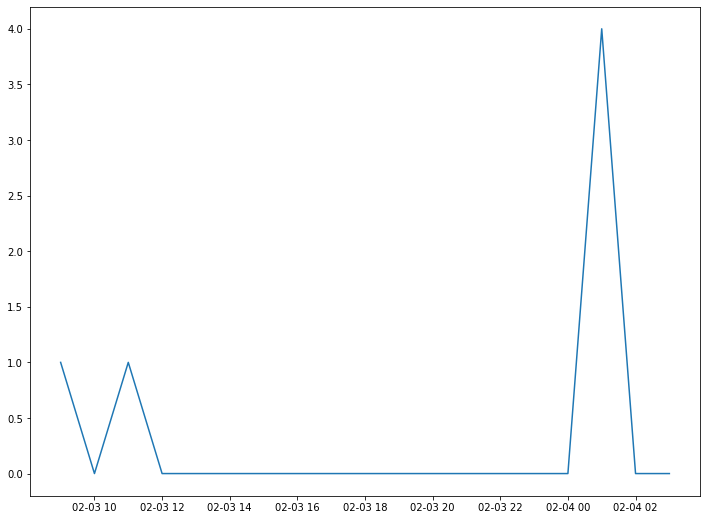

In [22]:
plt.figure(figsize=(12,9))
plt.plot(hours['label']);

In [26]:
feb=pd.DataFrame(df_clean[['text_clean','label']])

In [27]:
feb

,text_clean,label
date,,
2019-02-03 09:00:00+00:00,Btw jgh,0
2019-02-03 09:00:00+00:00,New Words amp Pictures out today Follow this l...,0
2019-02-03 09:00:00+00:00,Weekends are made for adventures We take a fin...,0
2019-02-03 09:00:00+00:00,China s surge in global university rankings ha...,0
2019-02-03 09:00:00+00:00,4 2 days until LIGHTS OUT in Australia Six wee...,0
...,...,...
2019-02-04 03:59:59+00:00,Tonight highlights the great job Pederson did ...,0
2019-02-04 03:59:59+00:00,The latest The Tucson Daily Thanks to socialme...,0
2019-02-04 03:59:59+00:00,407 I ALWAYS SHOUT THAT MY VIDEOS HAVE ONLY TH...,0


In [28]:
feb.to_csv('feb3.csv')